# GDP
<a href="https://www.esri.cao.go.jp/en/sna/data/sokuhou/files/2022/qe223_2/gdemenuea.html"> Gross domestic product (GDP)</a> is a measure of the market value of all the final goods and services produced in a period. GDP is an indicator of how well the economy is doing.

In [1]:
import pandas as pd

In [2]:
URL = "https://www.esri.cao.go.jp/jp/sna/data/data_list/sokuhou/files/2022/qe223_2/tables/gaku-jcy2232.csv"
df = pd.read_csv(URL, encoding='Shift JIS-2004',
                engine='python',skiprows=range(5),skipfooter=2)
df = df.iloc[1:]
df = df.rename(columns={'Unnamed: 0':'Year'})
df['Year'] = df['Year'].apply(lambda x: x.split('/')[0])
df.set_index('Year', inplace=True)
df.head()

,GDP(Expenditure Approach),PrivateConsumption,Consumption ofHouseholds,ExcludingImputed Rent,PrivateResidentialInvestment,Private Non-Resi.Investment,Changein PrivateInventories,GovernmentConsumption,PublicInvestment,Changein PublicInventories,...,DomesticDemand,PrivateDemand,PublicDemand,Unnamed: 26,Gross Fixed CapitalFormation,Unnamed: 28,Final Sales of Domestic Product,Unnamed: 30,Unnamed: 31,Unnamed: 32
Year,,,,,,,,,,,,,,,,,,,,,
1994,"446,522.3","249,412.3","245,437.7","210,086.7","31,733.1","66,333.9",-87.9,"72,336.5","46,623.2",454.2,...,"462,987.4","345,825.6","117,297.8",NaN,"141,097.2",NaN,"445,810.5",NaN,NaN,NaN
1995,"458,270.3","255,553.5","251,364.7","215,236.8","30,403.2","71,354.5","1,682.2","75,103.3","46,863.1",147.6,...,"477,927.5","357,957.5","120,052.7",NaN,"145,619.7",NaN,"456,103.9",NaN,NaN,NaN
1996,"472,631.9","260,557.9","256,286.2","219,355.5","33,702.7","75,665.3","2,186.1","76,862.3","49,515.1",322.9,...,"495,343.7","370,964.2","124,467.1",NaN,"155,531.2",NaN,"469,850.6",NaN,NaN,NaN
1997,"477,269.5","262,002.6","257,733.9","220,021.7","30,418.3","78,380.2","2,646.3","78,073.0","46,161.1",201.0,...,"495,317.0","372,864.7","122,452.9",NaN,"152,546.8",NaN,"474,147.6",NaN,NaN,NaN
1998,"471,206.6","260,307.9","255,469.0","217,100.4","26,324.5","77,323.8","1,795.1","79,089.5","44,250.6",-93.0,...,"487,022.3","365,614.2","121,453.3",NaN,"146,032.4",NaN,"469,098.9",NaN,NaN,NaN


Rename column names:

In [3]:
gdp = df[['GDP(Expenditure Approach)','PrivateConsumption','PrivateResidentialInvestment','Private Non-Resi.Investment','Changein PrivateInventories','GovernmentConsumption','PublicInvestment','Changein PublicInventories','Goods & Services','Residual']]
gdp = gdp.rename(columns={'GDP(Expenditure Approach)':'GDP',
                          'PrivateConsumption':'Consumption',
                          'PrivateResidentialInvestment':'Housing Investment',
                          'Private Non-Resi.Investment':'Business Spending',
                          'Changein PrivateInventories':'Inventories',
                          'GovernmentConsumption':'Government',
                          'PublicInvestment':'Govt Investment',
                          'Changein PublicInventories':'Govt Inventories',
                          'Goods & Services':'Net Exports'})

In [4]:
gdp.head(2)

,GDP,Consumption,Housing Investment,Business Spending,Inventories,Government,Govt Investment,Govt Inventories,Net Exports,Residual
Year,,,,,,,,,,
1994,"446,522.3","249,412.3","31,733.1","66,333.9",-87.9,"72,336.5","46,623.2",454.2,"-8,619.7","-11,663.3"
1995,"458,270.3","255,553.5","30,403.2","71,354.5","1,682.2","75,103.3","46,863.1",147.6,"-13,113.8","-9,723.3"


Numbers appear to be in string format so let's convert them to numbers

In [5]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 1994 to 2021
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GDP                 28 non-null     object 
 1   Consumption         28 non-null     object 
 2   Housing Investment  28 non-null     object 
 3   Business Spending   28 non-null     object 
 4   Inventories         28 non-null     object 
 5   Government          28 non-null     object 
 6   Govt Investment     28 non-null     object 
 7   Govt Inventories    28 non-null     float64
 8   Net Exports         28 non-null     object 
 9   Residual            28 non-null     object 
dtypes: float64(1), object(9)
memory usage: 2.4+ KB


In [6]:
gdp['GDP'].dtype =='object'

True

In [7]:
for col in gdp.columns:
    if gdp[col].dtype == 'object':
        gdp[col] = gdp[col].str.replace(',','').astype('float')
gdp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 1994 to 2021
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GDP                 28 non-null     float64
 1   Consumption         28 non-null     float64
 2   Housing Investment  28 non-null     float64
 3   Business Spending   28 non-null     float64
 4   Inventories         28 non-null     float64
 5   Government          28 non-null     float64
 6   Govt Investment     28 non-null     float64
 7   Govt Inventories    28 non-null     float64
 8   Net Exports         28 non-null     float64
 9   Residual            28 non-null     float64
dtypes: float64(10)
memory usage: 2.4+ KB


### Stacked bar chart of each GDP component
**Note:** Consumption dropped during the pandemic

In [8]:
gdp_components = gdp[['Consumption','Housing Investment','Business Spending','Inventories','Government','Govt Investment','Govt Inventories','Net Exports','Residual']]

<AxesSubplot:xlabel='Year'>

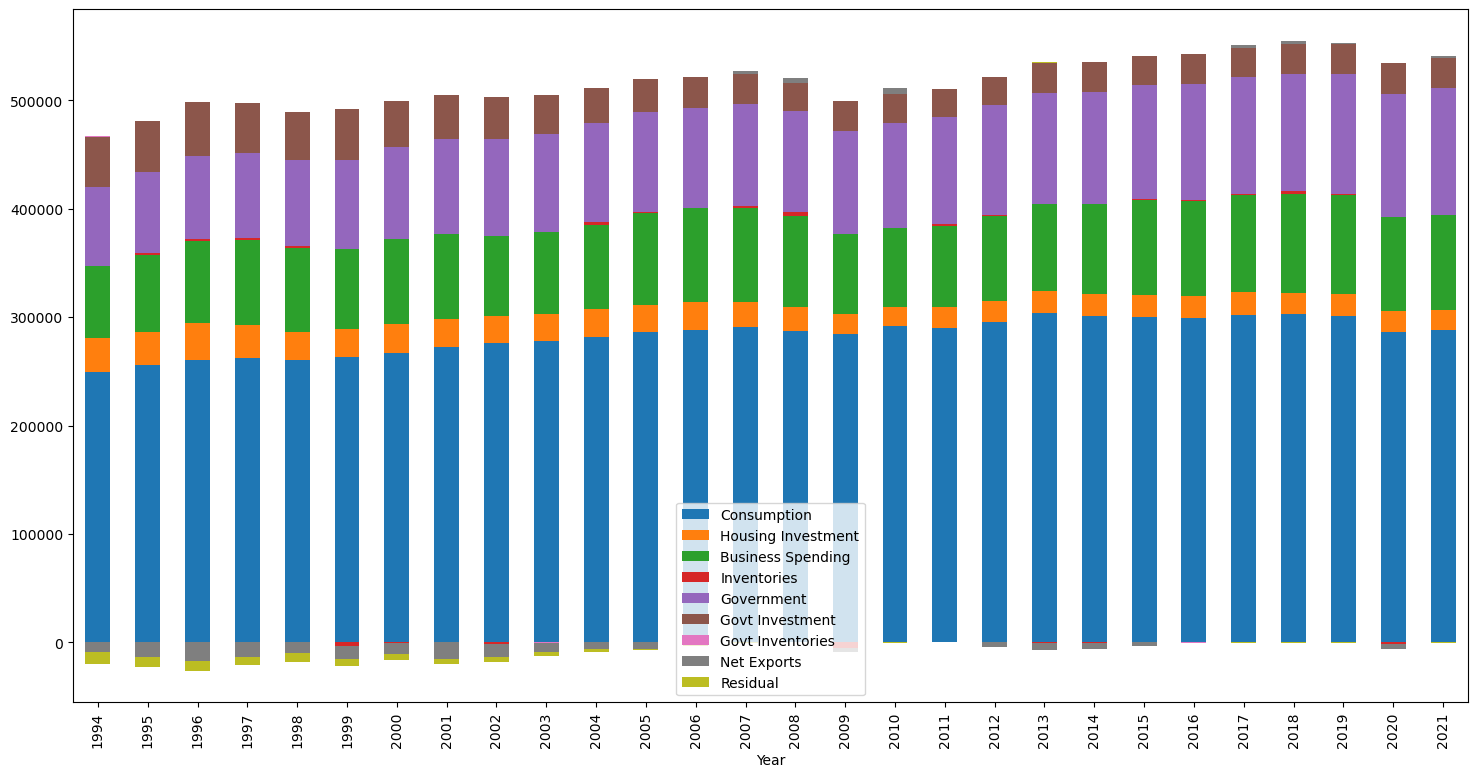

In [9]:
gdp_components.plot(kind='bar',stacked=True,figsize=(18, 9))

Another thing to notice is Net Exports, which points to Japan's ballooning trade deficit (thanks to inflation, the weak yen, soaring import costs of energy, oh and the war in Ukraine). Let's zoom in a bit and take a look at official data from Japan's customs bureau.

# Trade Statistics
**Seasonally-adjusted data in millions (yen)
https://www.customs.go.jp/toukei/shinbun/trade-st_e/2022/2022_115e.pdf

In [10]:
trade_link = "https://www.customs.go.jp/toukei/shinbun/trade-st/timeseries_202212.csv"
trade = pd.read_csv(trade_link, encoding='Shift JIS-2004',
                engine='python',skiprows=range(2))
trade.head()

,Years/Months,Exp-Total,Imp-Total
0,2013/01,5377294,5900001
1,2013/02,5559603,6567157
2,2013/03,5706131,6779741
3,2013/04,5716577,6809868
4,2013/05,6212602,7014313


Let's add a new column called "Trade Balance" which is `Exports - Imports`.

In [11]:
trade.rename(columns={"Exp-Total": "Exports", "Imp-Total":"Imports"},inplace=True)
trade['Trade Balance'] = trade.apply(lambda row: row['Exports'] - row['Imports'], axis=1)
trade.head()

,Years/Months,Exports,Imports,Trade Balance
0,2013/01,5377294,5900001,-522707
1,2013/02,5559603,6567157,-1007554
2,2013/03,5706131,6779741,-1073610
3,2013/04,5716577,6809868,-1093291
4,2013/05,6212602,7014313,-801711


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

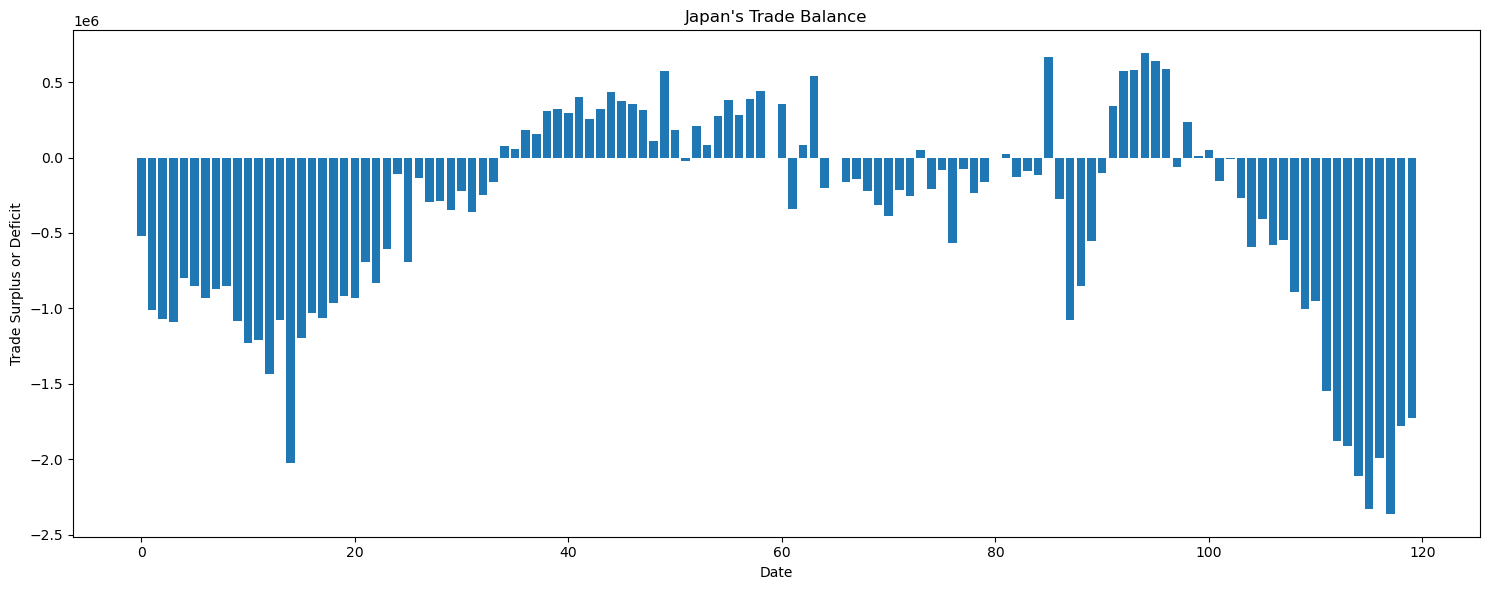

In [13]:
plt.figure(figsize=(15,6))
plt.bar(trade.index, trade['Trade Balance'])
plt.xlabel('Date')
plt.ylabel('Trade Surplus or Deficit')
plt.title('''Japan's Trade Balance''')
plt.tight_layout()

Wow! We can really see Japan's trade deficit widening...

# Unemployment
Japan has bragging rights when it comes to a very low unemployment rate. But under the hood, the pool of available workers has been declining, despite best efforts to get more women and retired senior citizens to join the workforce. With the help of robots and foreign workers from Vietnam, China, the Philippines, Indonesia, Nepal, Myanmar, etc., some of the pain from Japan's worsening labor shortage has been alleviated. Let's look at the latest official data: https://www.stat.go.jp/english/data/roudou/lngindex.html

In [14]:
header = pd.read_excel('lt01-a10.xlsx',sheet_name=0,skiprows=6,skipfooter=4,index_col=[0,2], header=None).iloc[[0,2],2:].ffill(axis=1)
header = pd.MultiIndex.from_arrays(header.values)
# read the rest of the table (skip more rows) and assign the constructed header to the dataframe columns
df = pd.read_excel('lt01-a10.xlsx',sheet_name=0,skiprows=10,skipfooter=4,index_col=[0,2], header=None).iloc[:,2:]
df.columns=header                   

C:\Users\tacaq\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
C:\Users\tacaq\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [15]:
df.head()

Labour force              Employed person               \
                Both sexes  Male Female      Both sexes  Male Female   
0        2                                                             
昭和28年    Jan.         4122  2416   1708            4044  2371   1673   
1953     Feb.         4001  2375   1625            3925  2331   1590   
         Mar.         4008  2382   1624            3939  2339   1598   
※注_Notes Apr.         3956  2369   1588            3877  2321   1554   
         May          3917  2357   1562            3837  2307   1531   

                Employee              Unemployed person              \
              Both sexes  Male Female        Both sexes Male Female   
0        2                                                            
昭和28年    Jan.       1715  1222    493                79   45     34   
1953     Feb.       1687  1200    486                77   44     33   
         Mar.       1676  1195    480                73   45     28   
※注_Notes Apr.       1647  1186    461                81   48     33   
         May        1648  1193    456                80   50     30   

              Not in labour force             Unemployment rate  (percent)  \
                       Both sexes Male Female                   Both sexes   
0        2                                                                   
昭和28年    Jan.                1566  325   1244                          1.9   
1953     Feb.                1668  359   1310                          1.9   
         Mar.                1670  353   1316                          1.8   
※注_Notes Apr.                1727  369   1357                          2.0   
         May                 1785  384   1400                          2.0   

                           
              Male Female  
0        2                 
昭和28年    Jan.  1.9    2.0  
1953     Feb.  1.9    2.1  
         Mar.  1.9    1.7  
※注_Notes Apr.  2.0    2.1  
         May   2.1    1.9

In [16]:
# remove all the japanese years and other entries by coercing the values to be numeric. 
# Western years will remain, anything containing strings will become nan
years = pd.to_numeric(df.index.get_level_values(0),errors='coerce')
# Since the western years are on the second row of each year, move the values up by one row 
# doing this by removing the first value and repeating the last value twice
# then, fill all the nan values with the last non-nan value (forward-fill)
# finaly, convert the years to int
years = pd.Series(years[1:].tolist()+ [years[-1]]).ffill().astype(int)
# check if this was correctly done. See how many times each year appears. Each year appears 12 times, so that looks ok
print(years.value_counts().values)
# check the second level - remove the dots at the end of some months
months = df.index.get_level_values(1).str.replace(".","")
# all months appear 70 times, so that looks ok
print(months.value_counts())
# create a new multi-index with the years and months and assign it to the df index
df.index = pd.MultiIndex.from_arrays([years, months], names=('year','month'))
# OR create a datetime column so it's easier to plot
df.index = pd.to_datetime([f'{m} {y}' for m,y in zip(years,months)])
df.index.name='date'

[12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12]
Jan     70
Feb     70
Mar     70
Apr     70
May     70
June    70
July    70
Aug     70
Sept    70
Oct     70
Nov     70
Dec     70
Name: 2, dtype: int64


C:\Users\tacaq\AppData\Local\Temp\ipykernel_13004\4240143199.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  months = df.index.get_level_values(1).str.replace(".","")


In [17]:
df.tail()

Labour force              Employed person                Employee  \
             Both sexes  Male Female      Both sexes  Male Female Both sexes   
date                                                                           
2022-08-01         6905  3812   3094            6730  3707   3023       6046   
2022-09-01         6923  3820   3105            6743  3711   3031       6066   
2022-10-01         6910  3804   3107            6736  3699   3037       6058   
2022-11-01         6883  3782   3103            6713  3679   3035       6033   
2022-12-01         6891  3795   3096            6719  3693   3028       6041   

                        Unemployed person             Not in labour force  \
            Male Female        Both sexes Male Female          Both sexes   
date                                                                        
2022-08-01  3281   2765               175  104     73                4108   
2022-09-01  3291   2777               183  109     75                4099   
2022-10-01  3281   2776               178  107     71                4115   
2022-11-01  3266   2767               173  104     69                4141   
2022-12-01  3274   2768               171  103     67                4139   

                        Unemployment rate  (percent)              
            Male Female                   Both sexes Male Female  
date                                                              
2022-08-01  1500   2605                          2.5  2.7    2.3  
2022-09-01  1500   2598                          2.6  2.8    2.4  
2022-10-01  1518   2596                          2.6  2.8    2.3  
2022-11-01  1539   2601                          2.5  2.8    2.2  
2022-12-01  1527   2609                          2.5  2.7    2.2

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
%matplotlib inline 

In [19]:
#remove gender
lbforce = df.xs('Both sexes', axis=1, level=1)
lbforce.drop('Unemployment rate  (percent)',axis=1,inplace=True)
lbforce.tail()

C:\Users\tacaq\AppData\Local\Temp\ipykernel_13004\467349060.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lbforce.drop('Unemployment rate  (percent)',axis=1,inplace=True)


,Labour force,Employed person,Employee,Unemployed person,Not in labour force
date,,,,,
2022-08-01,6905,6730,6046,175,4108
2022-09-01,6923,6743,6066,183,4099
2022-10-01,6910,6736,6058,178,4115
2022-11-01,6883,6713,6033,173,4141
2022-12-01,6891,6719,6041,171,4139


<AxesSubplot:xlabel='date'>

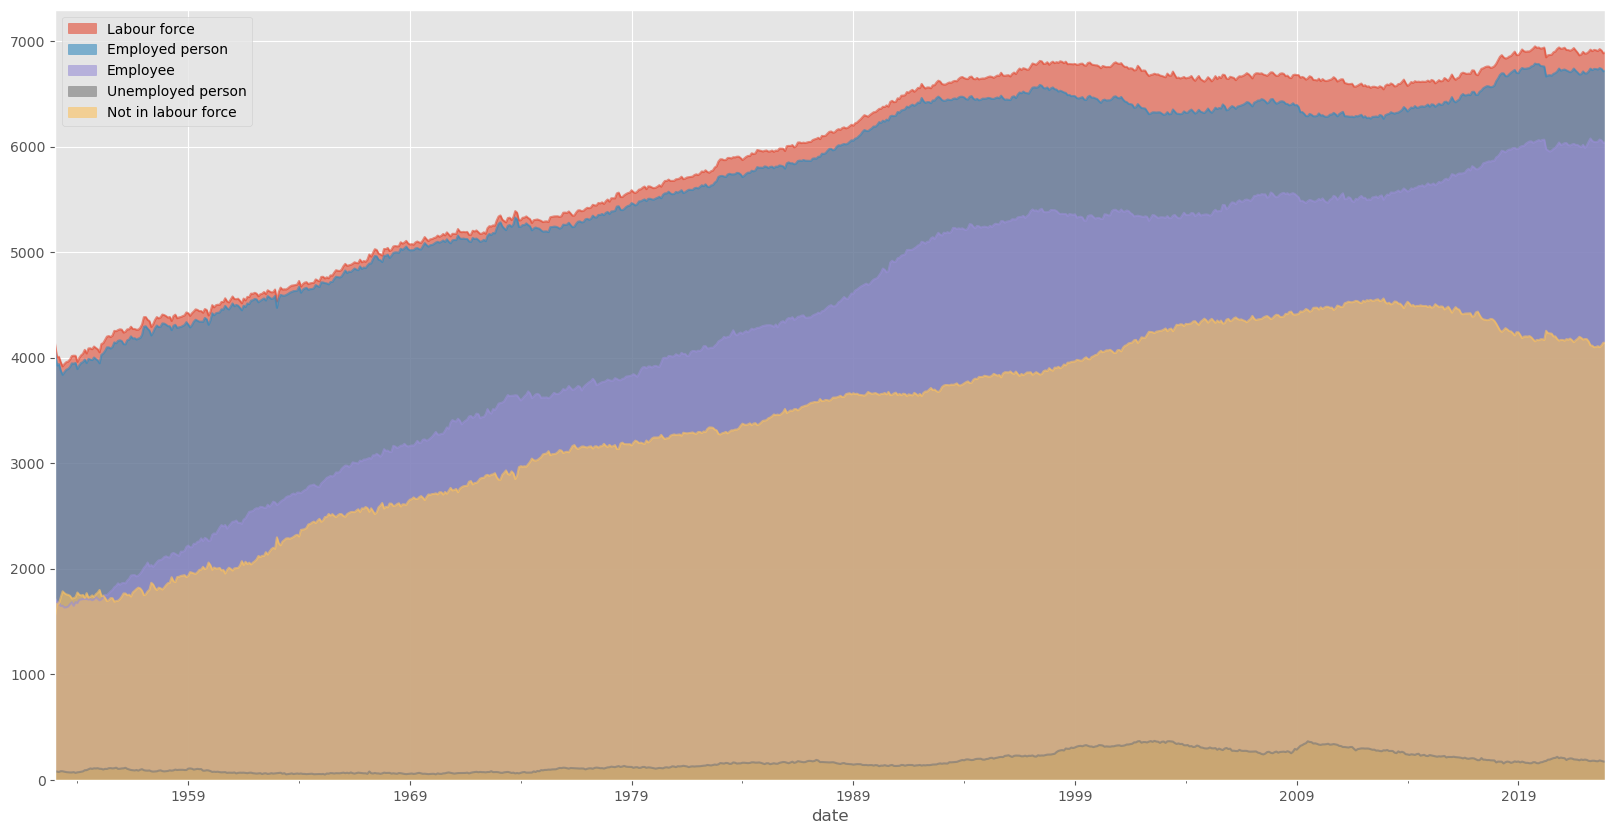

In [20]:
lbforce.plot(kind='area', stacked=False,alpha=0.6,figsize=(20,10))

<AxesSubplot:xlabel='date'>

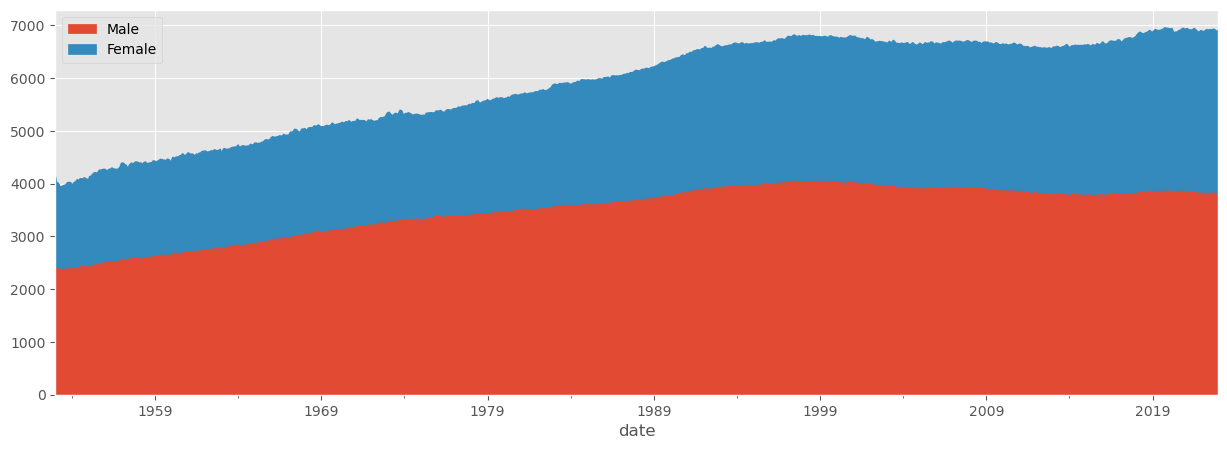

In [21]:
both_sexes = df['Labour force'][['Male','Female']]
both_sexes.plot(kind='area',figsize=(15,5))

# Thank you! ありがとうございました！